In [14]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
plt.style.use('ggplot')
from fbprophet import Prophet
from sklearn import metrics
from preprocess import join_sales_products, set_datetime_index

path = '~/Documents/interview_challenge/amorelie_task/data/'
df_sales = pd.read_csv(path + 'sales.csv')
df_products = pd.read_csv(path + 'products.csv')

df = join_sales_products(df_sales, df_products)
df = set_datetime_index(df)

In [2]:
# try forecast specific timeseries
df_daily = df[df['product_id'] == 14554]
df_daily_sold = df_daily['units_sold'].groupby(pd.Grouper(freq='D')).sum()

In [4]:
# simple train test split
df_prophet = pd.DataFrame({'ds': df_daily_sold.index, 'y': df_daily_sold.values})

n_test = 105
train = df_prophet.iloc[0:df_prophet.shape[0]-n_test]
test = df_prophet.iloc[-(n_test):]

In [6]:
# simple first model
model = Prophet(weekly_seasonality=True, daily_seasonality=True)
model.fit(train)
future = model.make_future_dataframe(periods=test.shape[0])
forecast = model.predict(future)

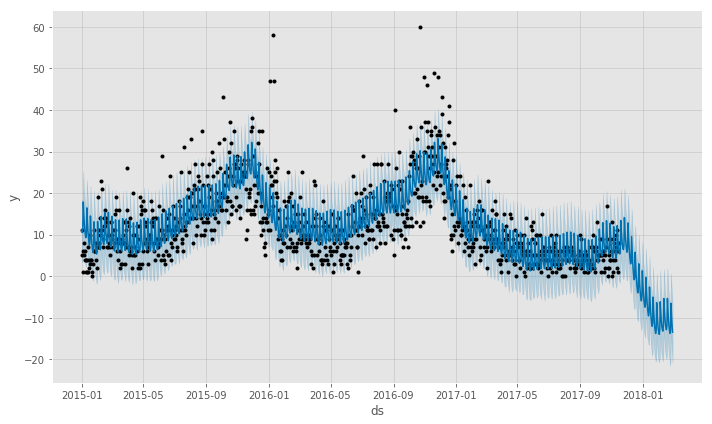

In [13]:
#TODO: add true point of forecast to 
model.plot(forecast)
#plt.scatter(x=test['ds'], y=test['y'])
plt.show()

In [16]:
print(metrics.r2_score(forecast['yhat'].iloc[-(n_test):], test['y']))

-0.7167602508499922


In [26]:
# add promotion to the model
promotion_dates = df_daily[(df_daily['promotion_dummy_1'] == 'Yes') | (df_daily['promotion_dummy_2'] == 'Yes')]
promotion_dates.head()

,product_id,website,date,units_sold,selling_price,promotion_dummy_1,promotion_dummy_2,brand,main_category_id,parent_category_id
date,,,,,,,,,,
2015-08-23,14554,2,2015-08-23,2,11.96,Yes,No,5,618,5
2015-08-23,14554,1,2015-08-23,0,10.90,Yes,No,5,618,5
2015-08-23,14554,3,2015-08-23,25,10.90,Yes,No,5,618,5
2016-03-31,14554,2,2016-03-31,0,9.04,Yes,No,5,618,5
2016-03-31,14554,3,2016-03-31,20,8.90,Yes,No,5,618,5


- only two promotions dates for this timeseries in three years --> not worth modeling

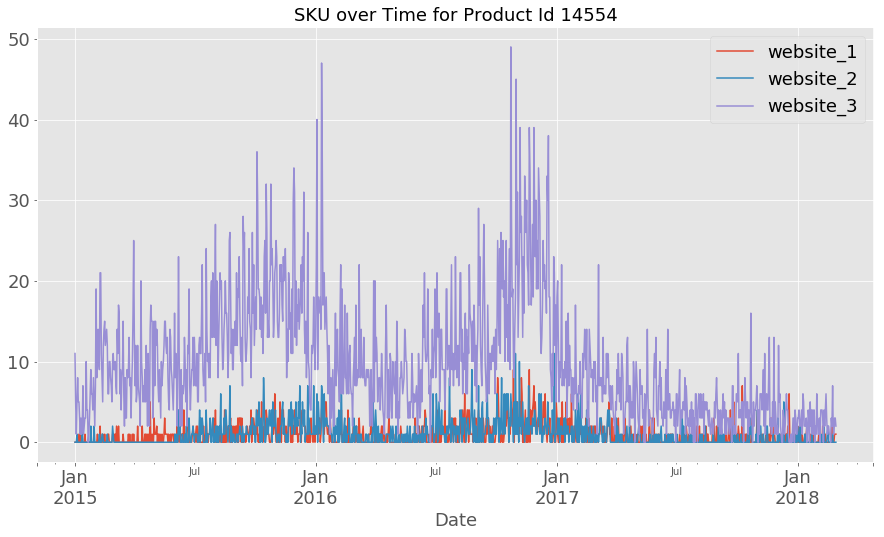

In [50]:
df_website = pd.DataFrame({'website_1': df_daily[(df_daily['website'] == 1)]['units_sold'],
                          'website_2': df_daily[(df_daily['website'] == 2)]['units_sold'],
                          'website_3': df_daily[(df_daily['website'] == 3)]['units_sold']})
df_website.plot(figsize=(15,8))
plt.title('SKU over Time for Product Id 14554', size=18)
plt.xticks(size = 18)
plt.yticks(size = 18)
plt.xlabel('Date', size = 18)
plt.legend(loc='best', fontsize=18)

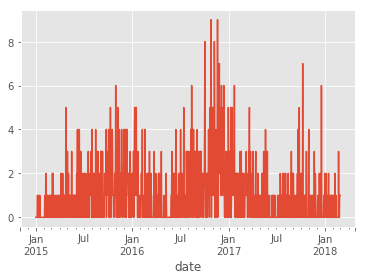

In [32]:
# add dadditional regressors --> main_category, parent_category time series (probably only possible with sarimax)
df_daily[(df_daily['website'] == 1)]['units_sold'].plot()

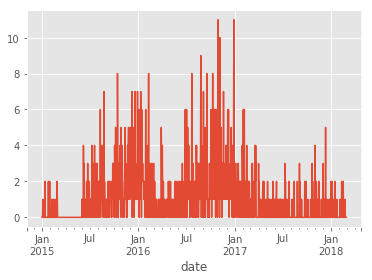

In [33]:
df_daily[(df_daily['website'] == 2)]['units_sold'].plot()

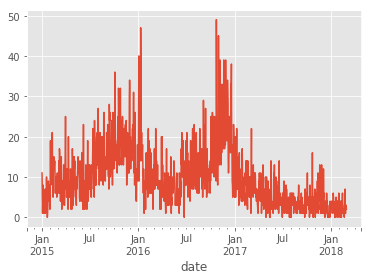

In [34]:
df_daily[(df_daily['website'] == 3)]['units_sold'].plot()